<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_10_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

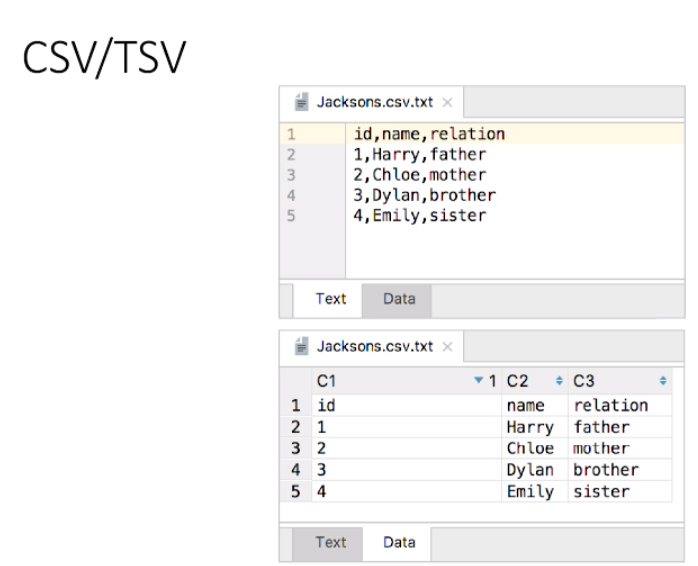

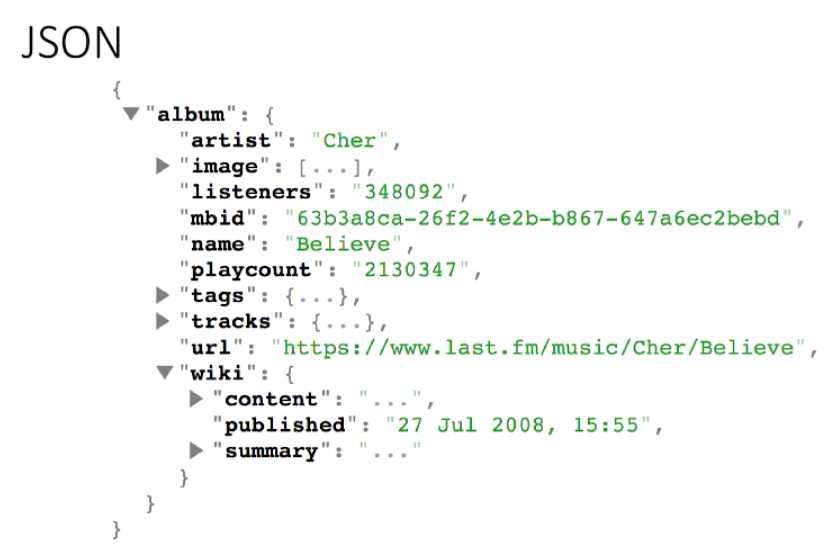

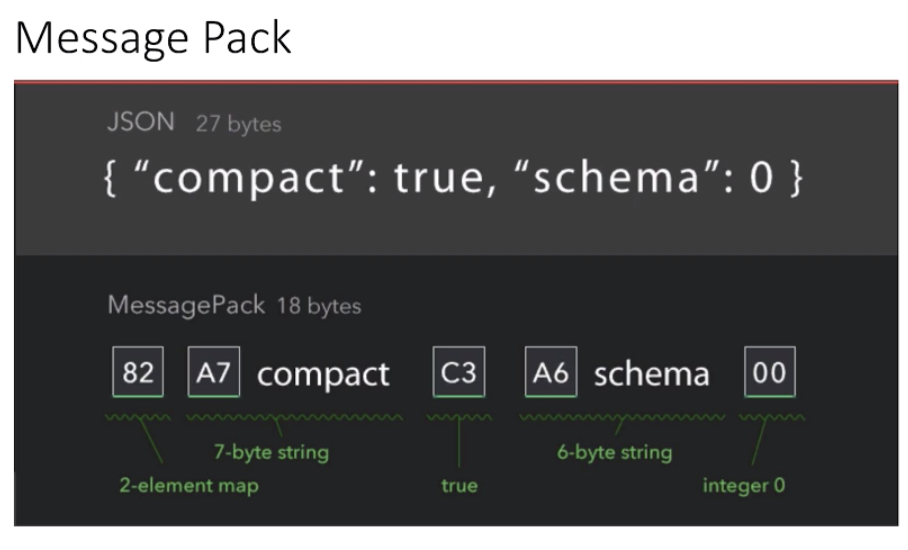

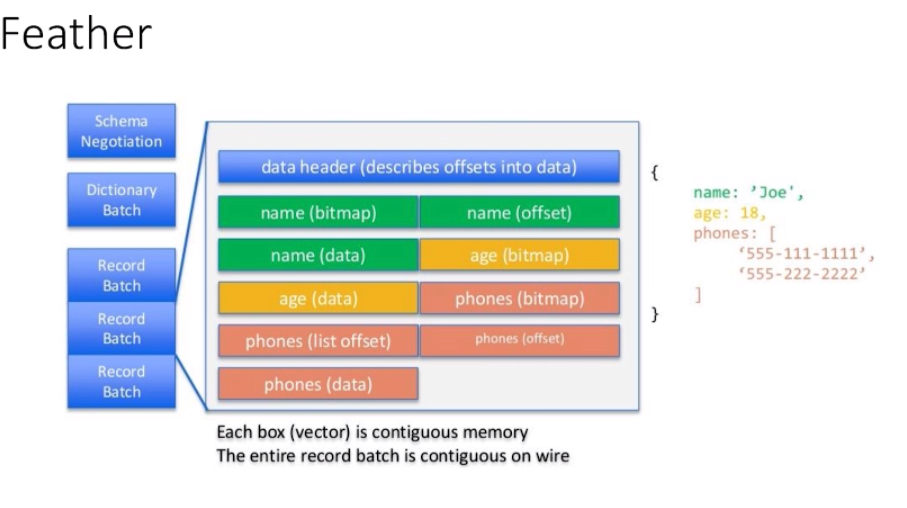

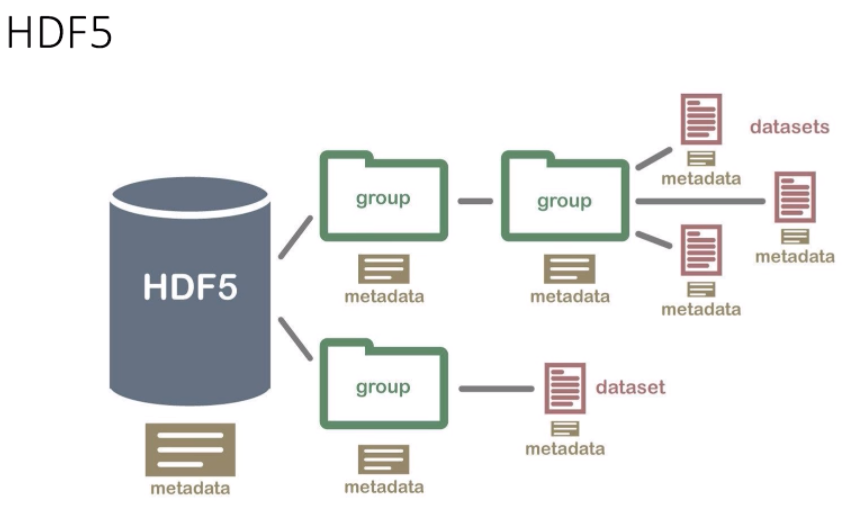

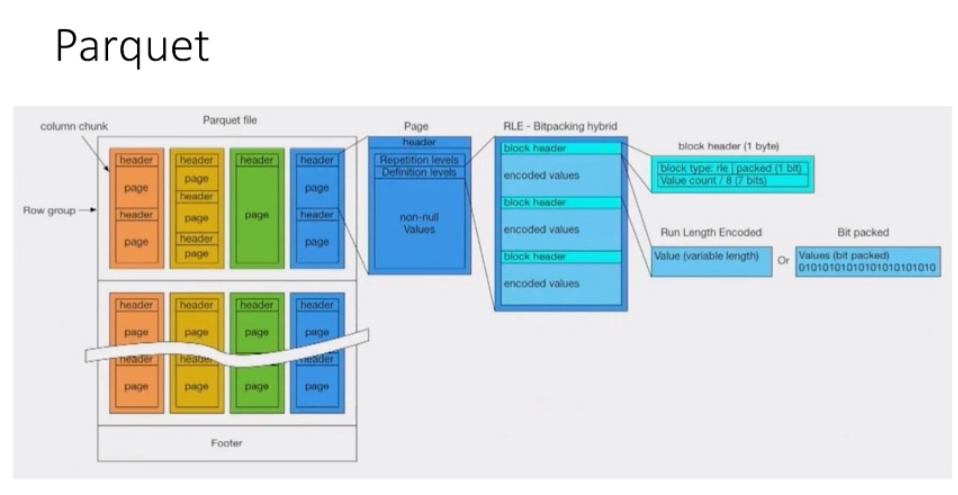

HDF5 и паркет рулят

**Форматы данных**

In [1]:
import os
import numpy as np
import pandas as pd
import msgpack
import h5py
import pyarrow.feather as feather

загрузка дпнных из scv  и вычислим его размер

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
print("Размер CSV:", round(os.stat('/content/drive/MyDrive/Colab Notebooks/energy_2.csv').st_size/1024), "Kb")

Размер CSV: 561 Kb


**massage pack**

преобразуем час в целое число, остальные в вещественные  сохраним в mpack

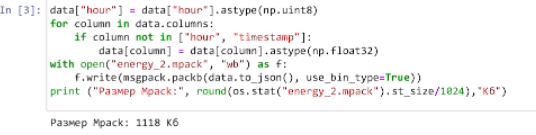

**HDF5**


In [8]:
data.to_hdf('energy_2.h5', 'data', mode = 'w')
print("Размер HDF5:", round(os.stat('energy_2.h5').st_size/1024), "Kb")

Размер HDF5: 1622 Kb


**Feather**

In [9]:
feather.write_feather(data, 'energy_2.feather')
print("Размер Feather:", round(os.stat('energy_2.feather').st_size/1024), "Kb")

Размер Feather: 174 Kb


**Parquet**

In [10]:
data.to_parquet('energy_2.parquet')
print("Размер Parquet:", round(os.stat('energy_2.parquet').st_size/1024), "Kb")

Размер Parquet: 84 Kb


In [11]:
#дополнительное сжатие
data.to_parquet('energy_2.parquet.br', compression='brotli')
print("Размер Parquet:", round(os.stat('energy_2.parquet.br').st_size/1024), "Kb")

Размер Parquet: 58 Kb


**ЗАДАНИЕ**

 1.Какие форматы данных используются при обучении моделей?

 Базовые, самые распространённые форматы- CSV/TSV. Довольно простой формат, преобразует входящие данные в таблицы. Однако не является иерархическим, в него неудобно вносить изменения, делать вложения и вообще работа с ним не самая комфортная.
JSON - это уже иерархический формат. В него можно довольно легко вносить дополнения, делать подпункты. Его недостаток, что он визуально громоздкий. Его структуру бывает не очень удобно разбирать.
Message Pack - логический наследник JSON. Позволяет объединять данные более компактно, при этом сохраняет все достоинства последнего. Но в нём затруднён процесс поколоночного поиска информации (точнее такая возможность вообще отсутствует).

Feather - ещё один наследник JSON, позволяющий добавлять метаданные прямо в структуру. Способен работать с пакетами.

HDF5 - очень удобный формат, иерархический, позволяющий делать сколь угодно большие ветвления. Заточен на быстрые выборки из большого объёма данных.

Parquet - самый продвинутый на сегодняшний момент формат. Хранит данные поколоночно, что позволяет довольно легко изменить любые данные в любом месте.

2.Посмотреть и повторить за спикером практическую часть.

2.1. получить данные и сохранить в разных форматах

In [12]:
import numpy as np
import pandas as pd

In [19]:
# загружаем все данные
energy_0 = pd.read_csv("http://video.ittensive.com/machine-learning/ashrae/train.0.csv.gz")
energy_0.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


сохраняем в CSV, Feather, HDF5, Parquet . сравниваем размеры

In [21]:
energy_0.to_csv('energy_0.csv', index=False)
print("Размер CSV:", round(os.stat('/content/energy_0.csv').st_size/1024), "Kb")

Размер CSV: 385554 Kb


In [26]:
energy_0.to_hdf('energy_0.h5', 'energy_0', mode = 'w')
print("Размер HDF5:", round(os.stat('energy_0.h5').st_size/1024), "Kb")

Размер HDF5: 436059 Kb


In [22]:
feather.write_feather(data, 'energy_0.feather')
print("Размер Feather:", round(os.stat('energy_0.feather').st_size/1024), "Kb")

Размер Feather: 105889 Kb


In [23]:
energy_0.to_parquet('energy_0.parquet.br', compression='brotli')
print("Размер Parquet:", round(os.stat('energy_0.parquet.br').st_size/1024), "Kb")

Размер Parquet: 33726 Kb


2.2 разбираем чтение фрейма данных из формата HDF5 и Parquet

In [24]:
energy_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060910 entries, 0 to 12060909
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 368.1+ MB


читаем из HDF5 и Parquet

In [28]:
energy_0_h5 = pd.read_hdf('energy_0.h5')
energy_0_h5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12060910 entries, 0 to 12060909
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 460.1+ MB


In [30]:
energy_0_p = pd.read_parquet('energy_0.parquet.br')
energy_0_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060910 entries, 0 to 12060909
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 368.1+ MB


со